In [168]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import Normalizer 
import numpy as np
import matplotlib.pyplot as plt

In [169]:
from scipy.sparse import lil_matrix # Needed for building the matrix of user ratings
import scipy.spatial.distance # Needed for calculating pairwise distances

In [170]:
%matplotlib inline

In [171]:
with open("Video_Games.csv", "r") as in_file:
    df = pd.read_csv(in_file)

In [172]:
df = df.fillna(0)
df = df.replace('tbd', 0)

In [173]:
df.head(4)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0,0.0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [174]:
feature_df = df[["Name", "Genre", "User_Score"]].set_index('Name')
feature_df

,Genre,User_Score
Name,,
Wii Sports,Sports,8
Super Mario Bros.,Platform,0
Mario Kart Wii,Racing,8.3
Wii Sports Resort,Sports,8
Pokemon Red/Pokemon Blue,Role-Playing,0
...,...,...
Samurai Warriors: Sanada Maru,Action,0
LMA Manager 2007,Sports,0
Haitaka no Psychedelica,Adventure,0


In [175]:
from sklearn.cluster import KMeans
import sklearn

In [176]:
rating_counts = pd.DataFrame(df['Rating'].value_counts().reset_index())
rating_counts

,Rating,count
0,0,6769
1,E,3991
2,T,2961
3,M,1563
4,E10+,1420
5,EC,8
6,K-A,3
7,RP,3
8,AO,1


In [177]:
genre_counts = pd.DataFrame(df['Genre'].value_counts().reset_index())
genre_counts

,Genre,count
0,Action,3370
1,Sports,2348
2,Misc,1750
3,Role-Playing,1500
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,874
9,Fighting,849


In [178]:
df = df.drop(['Platform', 'Year_of_Release', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Count', 'User_Count', 'Developer', 'Rating'], axis=1)

In [179]:
import pandas as pd

df['User_Score'] = df['User_Score'].astype(float)

# Get unique genres
unique_genres = df['Genre'].unique()

# Add binary columns for each unique genre
for genre in unique_genres:
    df[genre] = (df['Genre'] == genre).astype(int)

df.head()




,Name,Genre,Global_Sales,Critic_Score,User_Score,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy,0
0,Wii Sports,Sports,82.53,76.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Super Mario Bros.,Platform,40.24,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Racing,35.52,82.0,8.3,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Wii Sports Resort,Sports,32.77,80.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,Role-Playing,31.37,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [180]:
# Selecting only the numeric columns for normalization
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'int']).columns

print(numeric_cols)

# Min-max scaling
norm_df = df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

norm_df


Index(['Global_Sales', 'Critic_Score',   'User_Score',       'Sports',
           'Platform',       'Racing', 'Role-Playing',       'Puzzle',
               'Misc',      'Shooter',   'Simulation',       'Action',
           'Fighting',    'Adventure',     'Strategy',              0],
      dtype='object')


,Global_Sales,Critic_Score,User_Score,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy,0
0,1.000000,0.775510,0.824742,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.487518,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.430320,0.836735,0.855670,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.396995,0.816327,0.824742,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.380029,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16715,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16716,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16717,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
model = KMeans(n_clusters=24)

In [182]:
norm_df.columns = norm_df.columns.astype(str)

In [183]:
model.fit(norm_df)

KMeans(n_clusters=24)

In [184]:
model.cluster_centers_.shape

(24, 16)

In [185]:
model.inertia_

900.0427439179902

In [191]:
cluster_assigned_df = pd.DataFrame(model.predict(norm_df), columns=['cluster_id'])
cluster_assigned_df.index = norm_df.index

cluster_assigned_df

,cluster_id
0,11
1,18
2,4
3,11
4,8
...,...
16714,16
16715,1
16716,3
16717,18


In [221]:
cluster_assigned_df = pd.DataFrame(model.predict(norm_df), columns=['cluster_id'])
cluster_assigned_df.index = df['Name']

cluster_assigned_df[cluster_assigned_df['cluster_id'] == 19]

,cluster_id
Name,
Super Smash Bros. Brawl,19
Tekken 3,19
Super Smash Bros. Melee,19
Tekken 2,19
Street Fighter IV,19
...,...
TMNT: Mutant Melee,19
Digimon Rumble Arena,19
Mortal Kombat: Tournament Edition,19


In [ ]:
cluster_assigned_df['cluster_id'].value_counts()

In [193]:
for i in range(24):
    this_cluster = cluster_assigned_df[cluster_assigned_df['cluster_id'] == i]
    print('Cluster', i, this_cluster.shape[0])

    this_genre_counts = pd.DataFrame(norm_df.loc[this_cluster.index].sum(axis=0), columns=['count'])
    display(this_genre_counts.sort_values(by="count", ascending=False).head(5))

Cluster 0 735


,count
Role-Playing,735.000000
User_Score,579.824742
Critic_Score,534.336735
Global_Sales,6.040111
Sports,0.000000


Cluster 1 1346


,count
Sports,1346.000000
Critic_Score,139.581633
User_Score,51.030928
Global_Sales,5.393844
Platform,0.000000


Cluster 2 280


,count
Action,280.000000
User_Score,170.000000
Critic_Score,53.489796
Global_Sales,1.023025
Sports,0.000000


Cluster 3 1017


,count
Adventure,1017.000000
Critic_Score,36.857143
User_Score,4.680412
Global_Sales,1.606520
Sports,0.000000


Cluster 4 601


,count
Racing,601.000000
User_Score,448.845361
Critic_Score,419.306122
Global_Sales,5.778841
Sports,0.000000


Cluster 5 1331


,count
Misc,1331.000000
Critic_Score,78.530612
User_Score,11.865979
Global_Sales,4.337009
Sports,0.000000


Cluster 6 869


,count
Shooter,869.000000
User_Score,647.742268
Critic_Score,630.295918
Global_Sales,9.850218
Sports,0.000000


Cluster 7 553


,count
Simulation,553.000000
Critic_Score,29.979592
User_Score,11.010309
Global_Sales,2.039748
Sports,0.000000


Cluster 8 767


,count
Role-Playing,765.000000
Critic_Score,12.040816
Global_Sales,5.130514
User_Score,3.814433
0,2.000000


Cluster 9 409


,count
Platform,409.000000
User_Score,313.463918
Critic_Score,288.744898
Global_Sales,4.572952
Sports,0.000000


Cluster 10 382


,count
Strategy,382.000000
Critic_Score,11.755102
User_Score,4.721649
Global_Sales,1.123485
Sports,0.000000


Cluster 11 1002


,count
Sports,1002.000000
User_Score,740.536082
Critic_Score,737.255102
Global_Sales,10.463160
Platform,0.000000


Cluster 12 454


,count
Shooter,454.000000
Critic_Score,45.734694
User_Score,23.051546
Global_Sales,2.749273
Sports,0.000000


Cluster 13 580


,count
Puzzle,580.000000
Critic_Score,154.112245
User_Score,94.680412
Global_Sales,2.874697
Sports,0.000000


Cluster 14 466


,count
Fighting,466.000000
Critic_Score,18.561224
User_Score,7.144330
Global_Sales,2.300776
Sports,0.000000


Cluster 15 1531


,count
Action,1531.000000
User_Score,1156.484536
Critic_Score,1102.163265
Global_Sales,14.358580
Sports,0.000000


Cluster 16 1559


,count
Action,1559.000000
Critic_Score,129.336735
Global_Sales,5.359670
User_Score,4.329897
Sports,0.000000


Cluster 17 648


,count
Racing,648.000000
Critic_Score,95.275510
User_Score,16.123711
Global_Sales,2.902811
Sports,0.000000


Cluster 18 479


,count
Platform,479.000000
Critic_Score,56.408163
User_Score,8.701031
Global_Sales,5.354338
Sports,0.000000


Cluster 19 383


,count
Fighting,383.000000
User_Score,293.237113
Critic_Score,270.316327
Global_Sales,3.019026
Sports,0.000000


Cluster 20 419


,count
Misc,419.000000
User_Score,296.762887
Critic_Score,277.000000
Global_Sales,5.184077
Sports,0.000000


Cluster 21 286


,count
Adventure,286.000000
User_Score,215.927835
Critic_Score,178.469388
Global_Sales,1.115972
Sports,0.000000


Cluster 22 321


,count
Simulation,321.000000
User_Score,242.010309
Critic_Score,216.489796
Global_Sales,2.585555
Sports,0.000000


Cluster 23 301


,count
Strategy,301.000000
User_Score,229.175258
Critic_Score,210.387755
Global_Sales,0.908386
Sports,0.000000


In [ ]:
rows = []
for k in range(2, 40):
    model = KMeans(n_clusters=k, n_init="auto")
    model.fit(norm_df)
    rows.append({
        "k": k,
        "inertia": model.inertia_,
    })

    print(k, model.inertia_)

2 16566.78130188665
3 13427.565862438561
4 12328.11853292699
5 11240.482332079233
6 9684.001079511487
7 8553.018878573985
8

 7868.029243839377
9 6755.787629534124
10 6425.740943918702
11 5178.078253299447
12 4780.592471668986
13 3777.761525915037
14 3231.873229566929
15 2879.762003622579
16 2823.8006558559982
17 2495.01916410846
18 2057.0945291004714
19 1966.621968265868
20 1519.8446698030357
21 1331.178558149612
22 1245.1863630408448
23 1152.2182028272473
24 945.7329323786066
25 875.5790408244328
26 791.5976468324012
27 798.8764289605351
28 673.7770657720221
29 633.4523082105509
30 557.1005792398091
31 571.6595346714803
32 568.1380647315079
33 448.3039807978469
34 462.4600782639275
35 426.84940726658095
36 404.30016459321143
37 391.61507092645905
38 378.0491283213555
39 346.3431248393076


<Axes: xlabel='k'>

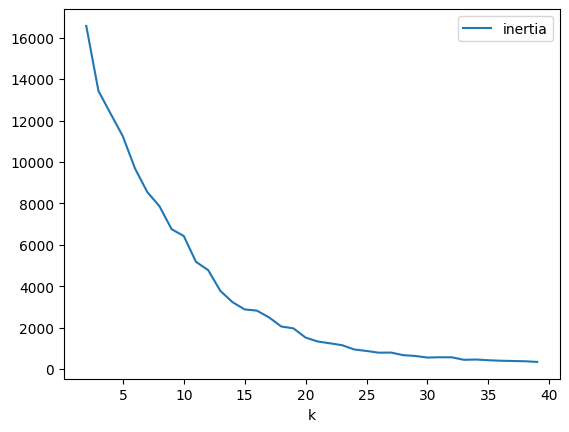

In [ ]:
pd.DataFrame(rows).set_index("k").plot()